# Problem Statement
The task is to automate the categorization of famous landmarks.

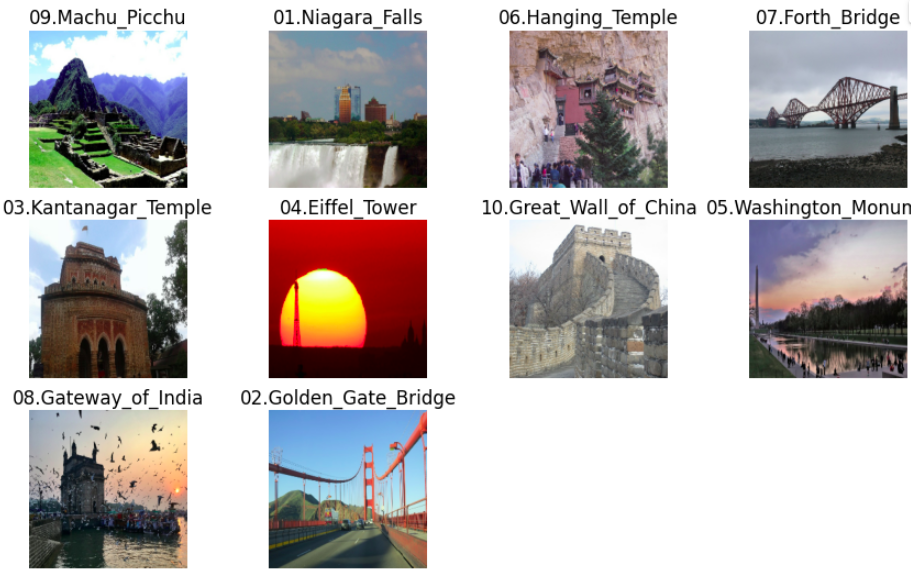

The dataset is obtained by downloading the images of the 10 famous landmark from Google search. Using these images, a CNN model has to be trained.

For inference, the CNN model will be fed with an image and the most probable landmark should be obtained as output.

# What Should Be The Performance Metric?
Accuracy would serve as a good performance metric. It is obtained by dividing the number of correct predictions by the total number of samples.

# Importing Python Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
tf.keras.utils.set_random_seed(111)
warnings.filterwarnings("ignore")

# Importing The Dataset And Preprocessing

### What kind of preprocessing needs to be applied?
- Normalize images such that the range is between 0 and 1, instead of 0 and 255.
- Resize images to (227, 227, 3).

In [3]:
# importing the dataset
train_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/train/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
val_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/validation/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
test_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/test/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [4]:
# preprocessing
data_preprocessing = tf.keras.Sequential(
    name = "data_preprocessing",
    layers = [tf.keras.layers.Rescaling(1.0/ 255)]
)

train_ds = train_data.map(lambda x, y: (data_preprocessing(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocessing(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocessing(x), y))

# Visualizing Samples Of The Data

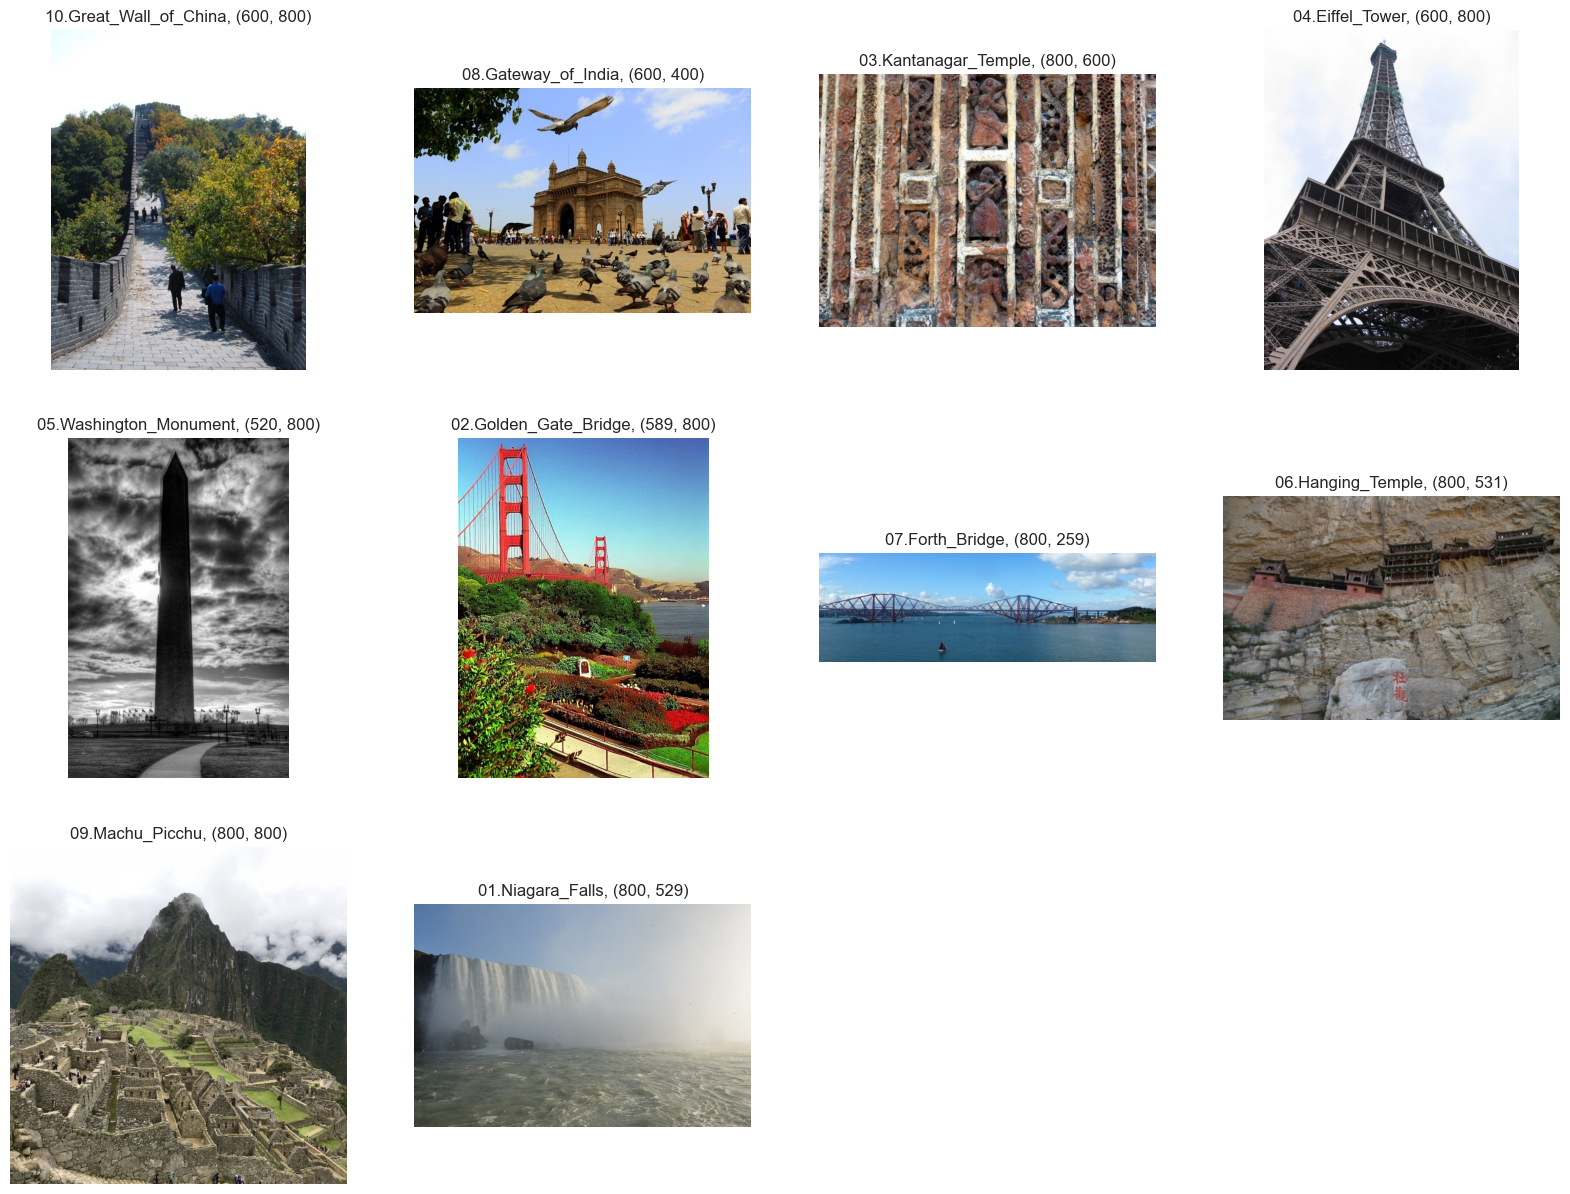

In [5]:
# list all the files inside the train directory
class_dirs = os.listdir("new_landmark_images/train/")
# dictionary to store the image array (key) for every class (value)
image_dict = {}
# dictionary to store the count of files (key) for every class (value)
count_dict = {}

# iterate through all the elements in class_dir
for cls in class_dirs:
    # create a list of all the paths in the sub-directory
    file_paths = glob.glob(f"new_landmark_images/train/{cls}/*")
    # count the number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select a random item from the list of image paths
    image_path = random.choice(file_paths)
    # load the image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

# visualize a random sample from each class
plt.figure(figsize = (20, 15))
# iterate through the dictionary items (class_label, image_dict)
for i, (cls, img) in enumerate(image_dict.items()):
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set class name along with image size as the title
    plt.title(f"{cls}, {img.size}")
    plt.axis("off")

# Checking For Data Imbalance

In [6]:
# creating a DataFrame of all the classes in training dataset along with their counts
df_count_train = pd.DataFrame(
    {
        "class": count_dict.keys(),
        "count": count_dict.values()
    }
)

df_count_train

,class,count
0,10.Great_Wall_of_China,72
1,08.Gateway_of_India,87
2,03.Kantanagar_Temple,88
3,04.Eiffel_Tower,64
4,05.Washington_Monument,83
5,02.Golden_Gate_Bridge,70
6,07.Forth_Bridge,82
7,06.Hanging_Temple,70
8,09.Machu_Picchu,55
9,01.Niagara_Falls,66


<Axes: title={'center': 'Count per class in training dataset'}, xlabel='class'>

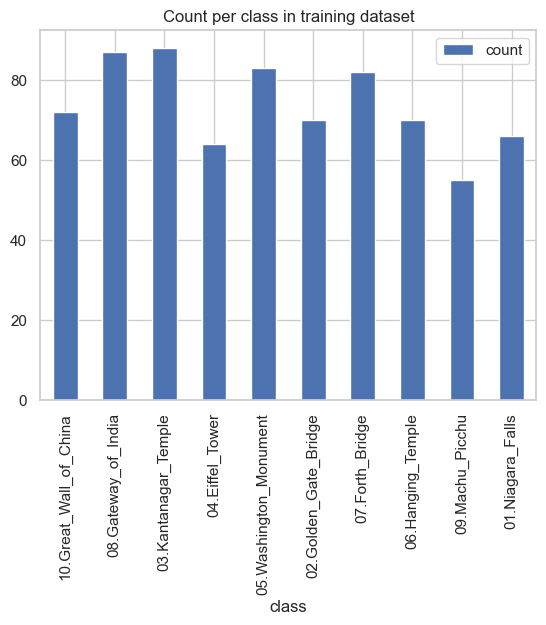

In [7]:
# plotting the data distribution of classes in the training dataset
df_count_train.plot.bar(x = "class", y = "count", title = "Count per class in training dataset")

In [8]:
# number of classes
len(count_dict.keys())

10

In [9]:
# names of the classes
for i in train_data.class_names:
    print(i)

01.Niagara_Falls
02.Golden_Gate_Bridge
03.Kantanagar_Temple
04.Eiffel_Tower
05.Washington_Monument
06.Hanging_Temple
07.Forth_Bridge
08.Gateway_of_India
09.Machu_Picchu
10.Great_Wall_of_China


Each class in the train dataset has about 70 images.

The same can be repeated for validation and test dataset as well.

Results,
- Each class in the validation dataset has about 15 images.
- Each class in the test dataset has about 5 images.